# The Spark Foundation - Gradute Rotational Internship Program
## Data Science & Business Analytics Internship
### Task2 -Preduction of optimum number of clusters and Visualization using the Unsupervised Machine Learning 
                                                                                 Dataset : https://bit.ly/3kXTdox
#### Level - Beginner
### Batch -December 2021
## Author : Chanikya Gairaboni
#### Objectives :
##### EDA
##### Statistical Description of Dataset
##### Checking the Null Values
##### Visualization
##### Correlation between the features
##### Data Preparation
##### Model Creation & Model Fitting
##### Finding the Best Cluster using the Elbow method and Visualization

### Importing Modules

In [56]:
### Importing basic Libraries
import numpy as np
import pandas as pd

### Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data Spliting Libraries
from sklearn.model_selection import train_test_split
### For warnings
import warnings
warnings.filterwarnings("ignore")

### Reading dataset using pandas

In [2]:
ird = pd.read_csv(r"C:\Users\Chani\Downloads\Iris.csv")

### EDA

In [3]:
ird.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ird.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
ird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### The Dataset Consits of 150 rows and 5 columns. The Data Elements all are Numeric type (int/float) except Species Column

In [6]:
ird.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

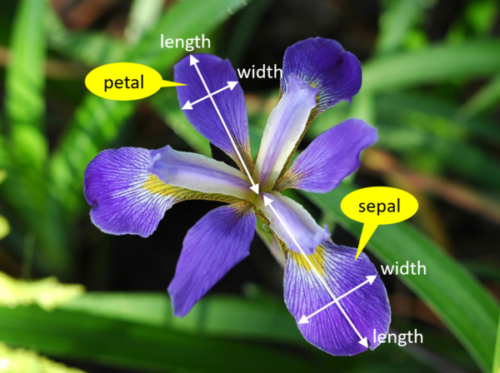

In [44]:
ird["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

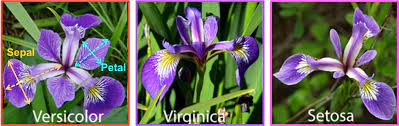

### Statistical Description of Dataset

In [7]:
ird.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ird.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### No Null Values 

In [9]:
ird["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
ird["Species"].value_counts()/len(ird)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

### Visualisation

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

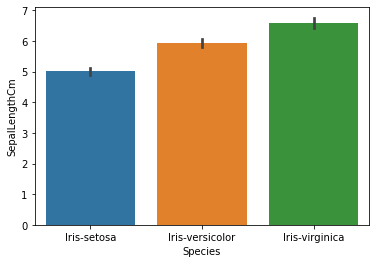

In [11]:
sns.barplot(y="SepalLengthCm",x = "Species",data = ird)

<AxesSubplot:xlabel='Species', ylabel='count'>

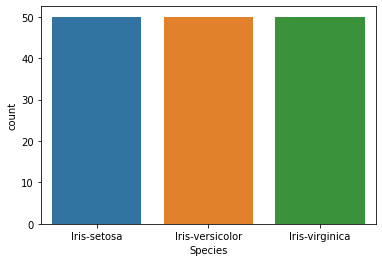

In [51]:
sns.countplot(x = "Species",data = ird)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

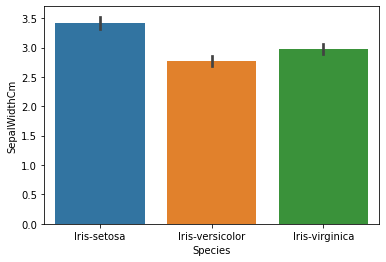

In [12]:
sns.barplot(y="SepalWidthCm",x = "Species",data = ird)

In [14]:
ird1 =ird.drop(["Id"],axis =1)

<AxesSubplot:>

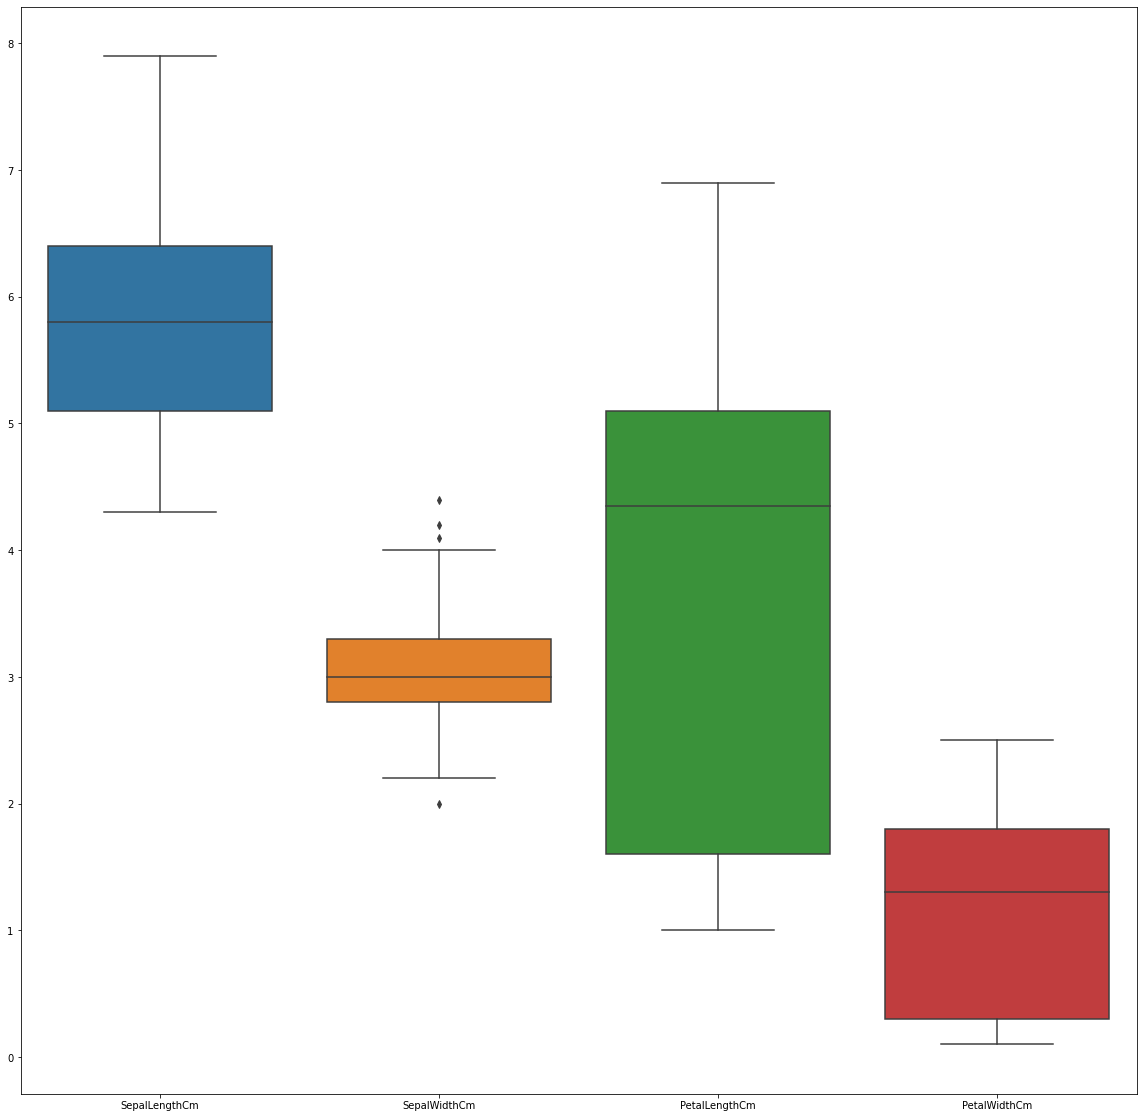

In [52]:
plt.figure(figsize=[20,20])
sns.boxplot(data= ird1)

#### PetalLengthCm column having outliers but we ignore it

<Figure size 2160x2160 with 0 Axes>

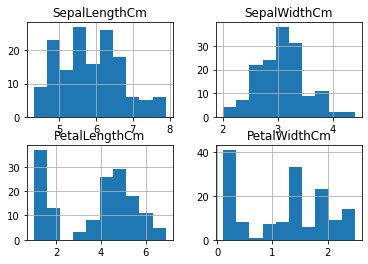

<Figure size 2160x2160 with 0 Axes>

In [15]:
ird1.hist(bins = 10)
plt.figure(figsize=[30,30])

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

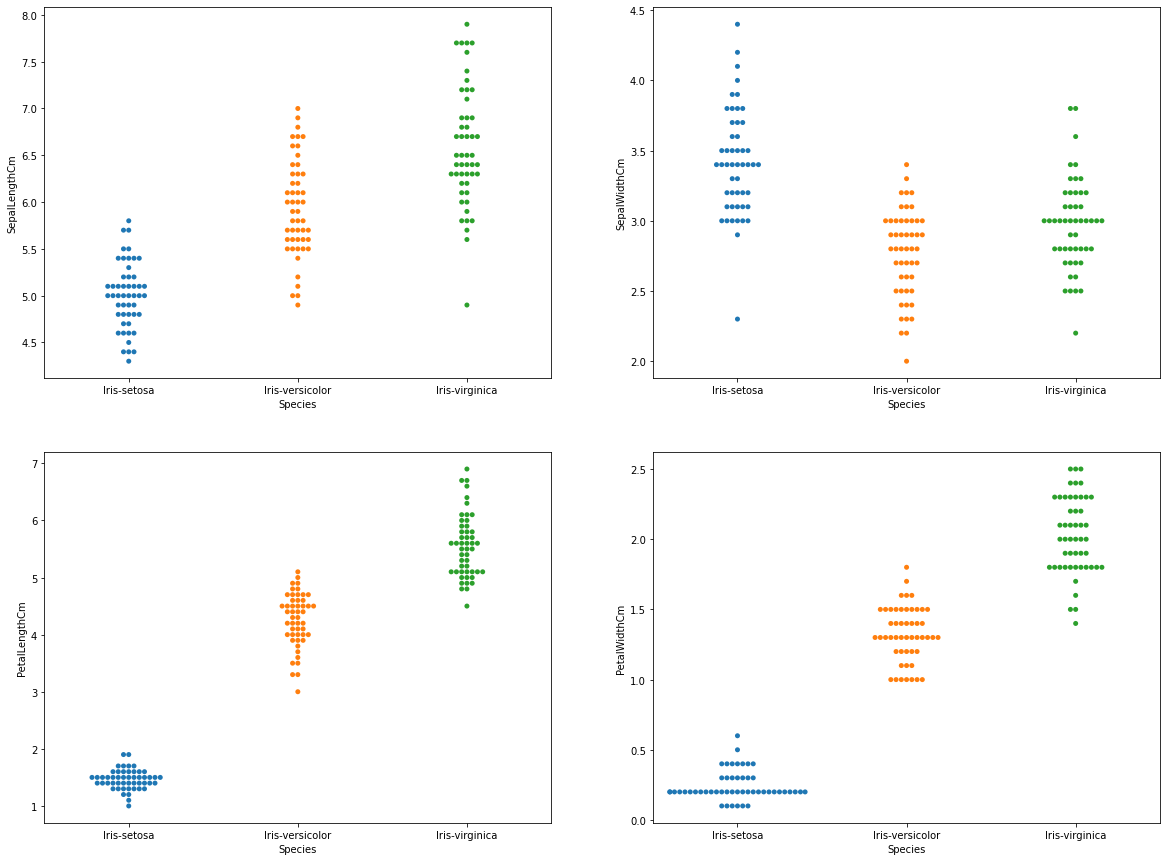

In [53]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.swarmplot(x='Species',y='SepalLengthCm',data=ird1)
plt.subplot(2,2,2)
sns.swarmplot(x='Species',y='SepalWidthCm',data=ird1)
plt.subplot(2,2,3)
sns.swarmplot(x='Species',y='PetalLengthCm',data=ird1)
plt.subplot(2,2,4)
sns.swarmplot(x='Species',y='PetalWidthCm',data=ird1)


#### Swarm plot which is similar to box or violin plot. In this plot we can see the all observations

<AxesSubplot:>

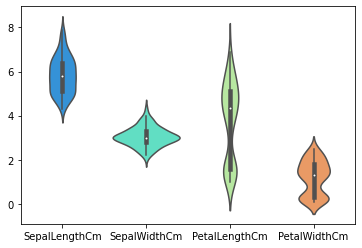

In [55]:
sns.violinplot(data = ird1,palette= "rainbow")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

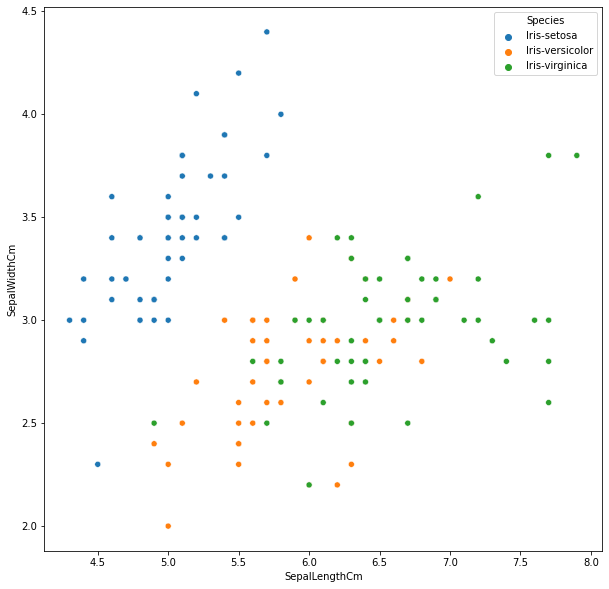

In [18]:
plt.figure(figsize=[10,10])
sns.scatterplot(x ="SepalLengthCm", y='SepalWidthCm',hue = "Species", data =ird1 )

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

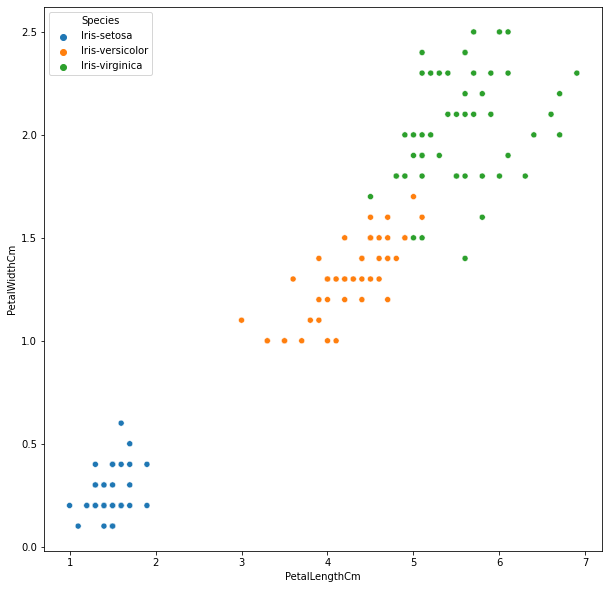

In [19]:
plt.figure(figsize=[10,10])
sns.scatterplot(x ="PetalLengthCm", y='PetalWidthCm',hue = "Species", data =ird1 )

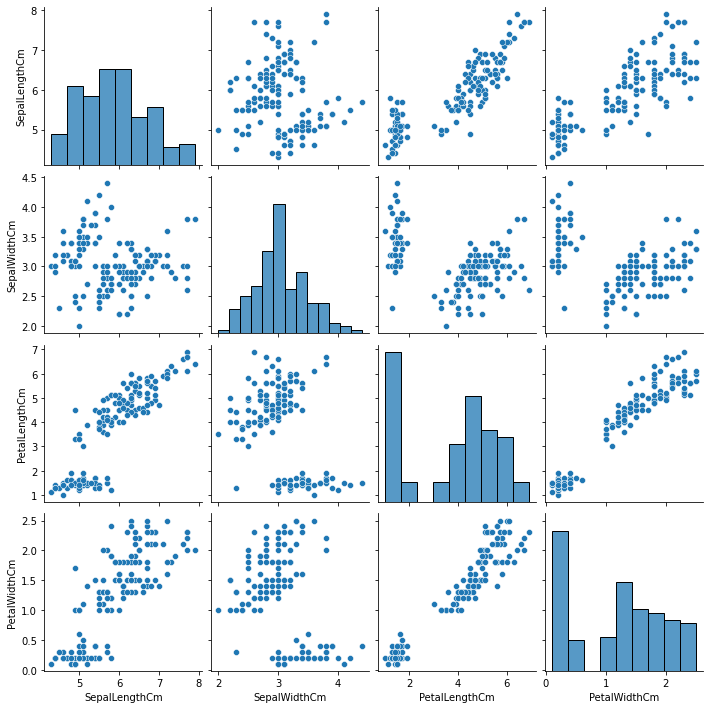

In [20]:
sns.pairplot(ird1)

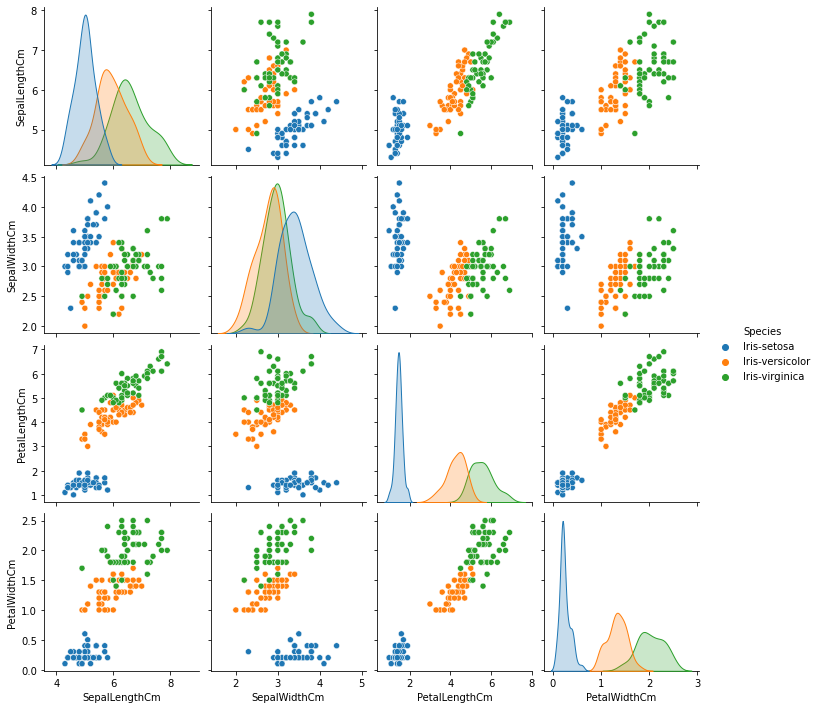

In [21]:
sns.pairplot(data =ird1,hue ="Species")

In [22]:
ird1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### corr() gives the relation between the features of a dataset

<AxesSubplot:>

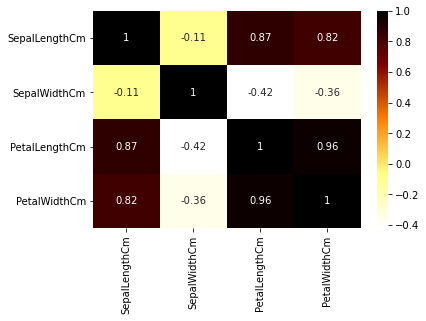

In [23]:
sns.heatmap(ird1.corr(),annot = True,cmap ="afmhot_r")

Text(0.5, 1.0, 'Cluster Heatmap')

<Figure size 720x432 with 0 Axes>

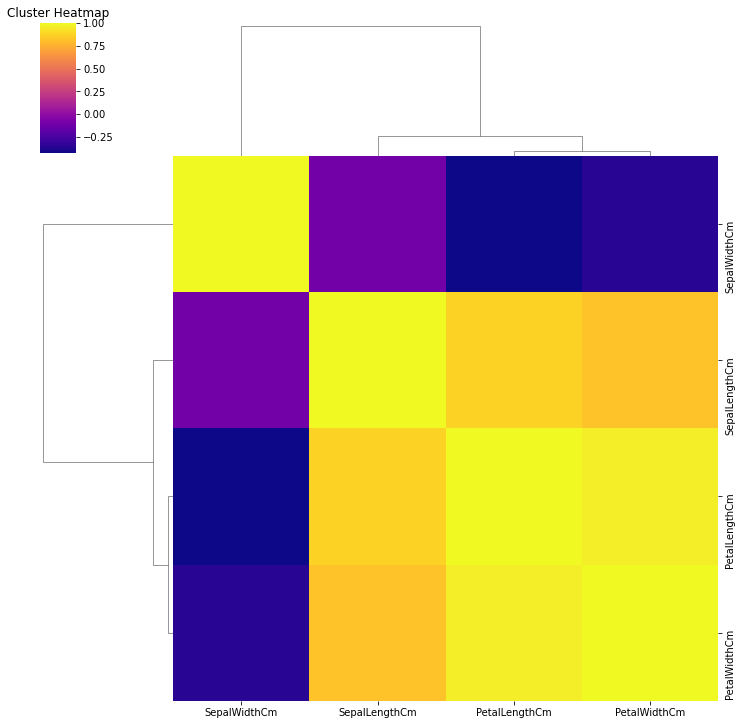

In [24]:
plt.figure(figsize=(10,6))
sns.clustermap(ird1.corr(), cmap='plasma')
plt.title('Cluster Heatmap')

#### Heatmap will gives the correlation between the features in graphical representation

###  Data Preparation

In [26]:
X = ird1.iloc[:,:-1]
y = ird1.iloc[:,-1]

In [27]:
X.shape

(150, 4)

In [28]:
y.shape

(150,)

### Splitting the dataset

#### This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
#### There is also a risk of overfitting the training data.
#### So we can't train the data

### Importing the Model Creation modules

In [57]:
from sklearn.cluster import KMeans

### Finding the best Cluster using the Elbow method

Text(0, 0.5, 'Scores')

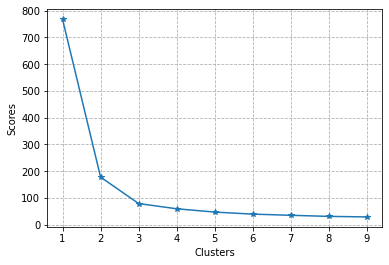

In [83]:
wss=[]
for k in range(1,10):
    cluster = KMeans(n_clusters=k,random_state=0)
    cluster.fit(X)
    wss.append(cluster.inertia_)
plt.grid(linestyle = '--')
plt.plot(range(1,10),wss,ls = "-",marker ="*")
plt.xlabel("Clusters")
plt.ylabel("Scores")

In [73]:
cluster = KMeans(n_clusters = 3,random_state = 0)
pred_cluster = cluster.fit_predict(X)

In [86]:
X["cluster"] = pred_cluster

In [75]:
cluster.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     , 0.44      ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097, 0.58064516],
       [6.85      , 3.07368421, 5.74210526, 2.07105263, 2.        ]])

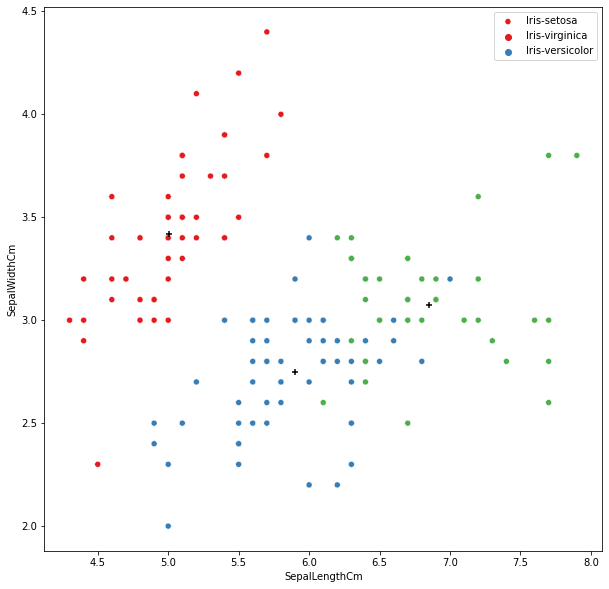

In [78]:
plt.figure(figsize = [10,10])
plots = sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data = X,hue = "cluster",palette = "Set1")
plots = plt.scatter(x=cluster.cluster_centers_[:,0],y=cluster.cluster_centers_[:,1],marker = "+",color = "black")
plt.legend(labels = ['Iris-setosa', 'Iris-virginica','Iris-versicolor'])

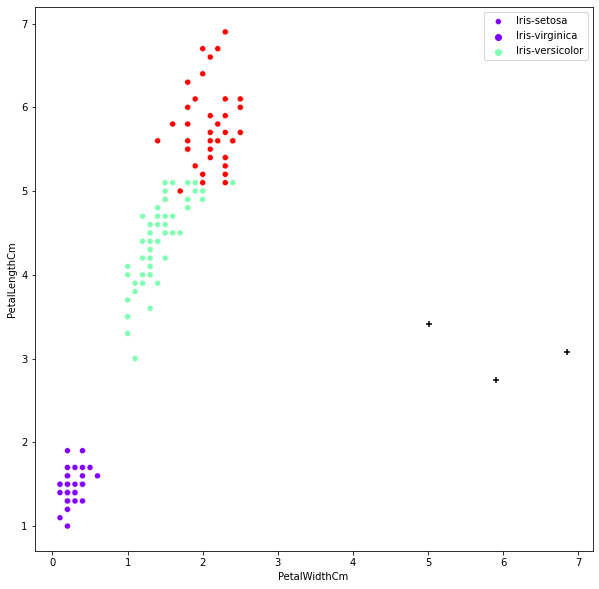

In [82]:
plt.figure(figsize = [10,10])
plots = sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data = X,hue = "cluster",palette = "rainbow")
plots = plt.scatter(x=cluster.cluster_centers_[:,0],y=cluster.cluster_centers_[:,1],marker = "+",color = "black")
plt.legend(labels = ['Iris-setosa', 'Iris-virginica','Iris-versicolor'])

In [85]:
kmeans = KMeans(3)
identified_clusters=kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [87]:
table_with_clusters=ird1.copy()
table_with_clusters['Clusters']=identified_clusters
table_with_clusters

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1
